In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3

# Multi-table Datasets - ENRON Archive

## 1. Data import

Connect to the file 'assets/datasets/enron.db' using one of these methods:

- sqlite3 python package
- pandas.read_sql
- SQLite Manager Firefox extension

Take a look at the database and query the master table. How many Tables are there in the db?

> Answer:
There are 3 tables:
- MessageBase
- RecipientBase
- EmployeeBase

In [40]:
conn = sqlite3.connect('../../assets/datasets/enron.db')
c = conn.cursor()

In [41]:
sql = """
SELECT * FROM sqlite_master
WHERE type = 'table'
"""

pd.read_sql(sql, con=conn)

,type,name,tbl_name,rootpage,sql
0,table,MessageBase,MessageBase,3,"CREATE TABLE MessageBase (\n mid INTEGER,\n..."
1,table,RecipientBase,RecipientBase,5,"CREATE TABLE RecipientBase (\n mid INTEGER,..."
2,table,EmployeeBase,EmployeeBase,2,CREATE TABLE EmployeeBase (\n ...


Query the `sqlite_master` table to retrieve the schema of the `EmployeeBase` table.

1. What fields are there?
1. What's the type of each of them?

In [10]:
sql = "SELECT * FROM EmployeeBASE LIMIT 1"

pd.read_sql(sql, con=conn)

,eid,name,department,longdepartment,title,gender,seniority
0,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior


1. Print the first 5 rows of EmployeeBase table
1. Print the first 5 rows of MessageBase table
1. Print the first 5 rows of RecipientBase table

**Hint**  use `SELECT` and `LIMIT`.

In [11]:
sql = "SELECT * FROM EmployeeBase LIMIT 5"
pd.read_sql(sql, con=conn)

,eid,name,department,longdepartment,title,gender,seniority
0,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior
1,2,Harry Arora,Forestry,ENA East Power,VP Trading,Male,Senior
2,3,Robert Badeer,Forestry,ENA West Power,Mgr Trading,Male,Junior
3,4,Susan Bailey,Legal,ENA Legal,Specialist Legal,Female,Junior
4,5,Eric Bass,Forestry,ENA Gas Texas,Trader,Male,Junior


In [12]:
sql = "SELECT * FROM MessageBase LIMIT 5"
pd.read_sql(sql, con=conn)

,mid,filename,unix_time,subject,from_eid
0,1,taylor-m/sent/11,910930020,Cd$ CME letter,138
1,2,taylor-m/sent/17,911459940,Indemnification,138
2,3,taylor-m/sent/18,911463840,Re: Indemnification,138
3,4,taylor-m/sent/23,911874180,"Re: Coral Energy, L.P.",138
4,5,taylor-m/sent/27,912396120,Bankruptcy Code revisions,138


In [13]:
sql = "SELECT * FROM RecipientBase LIMIT 5"
pd.read_sql(sql, con=conn)

,mid,rno,to_eid
0,1,1,59
1,2,1,15
2,3,1,15
3,4,1,109
4,4,2,49


Import each of the 3 tables to a Pandas Dataframes

In [14]:
employees = pd.read_sql("SELECT * FROM EmployeeBase", con=conn)
messages = pd.read_sql("SELECT * FROM MessageBase", con=conn)
recipient = pd.read_sql("SELECT * FROM RecipientBASE", con=conn)

## 2. Data Exploration

Use the 3 dataframes to answer the following questions:

1. How many employees are there in the company?
- How many messages are there in the database?
- Convert the timestamp column in the messages. When was the oldest message sent? And the newest?
- Some messages are sent to more than one recipient. Group the messages by message_id and count the number of recepients. Then look at the distribution of recepient numbers.
    - how many messages have only one recepient?
    - how many messages have >= 5 recepients?
    - what's the highest number of recepients?
    - who sent the message with the highest number of recepients?
- plot the distribution of recepient numbers using Bokeh

In [56]:
# Employees in the company
len(pd.unique(employees.eid))

sql = "SELECT COUNT(eid) FROM EmployeeBase"
pd.read_sql(sql, con=conn)

,COUNT(eid)
0,156


In [57]:
# Unique Messages
len(pd.unique(messages.mid))

sql = "SELECT COUNT(mid) FROM MessageBase"
pd.read_sql(sql,con=conn)

,COUNT(mid)
0,21635


In [63]:
# Convert Timestamp
messages['Date'] = pd.to_datetime(messages.unix_time, unit='s')

sql = "SELECT DATETIME(unix_time, 'unixepoch') FROM MessageBase LIMIT 10"
pd.read_sql(sql,con=conn)

,"DATETIME(unix_time, 'unixepoch')"
0,1998-11-13 04:07:00
1,1998-11-19 07:19:00
2,1998-11-19 08:24:00
3,1998-11-24 02:23:00
4,1998-11-30 03:22:00
5,1998-12-02 03:47:00
6,1998-12-02 05:24:00
7,1998-12-03 11:38:00
8,1998-12-04 01:15:00
9,1998-12-09 01:14:00


In [66]:
# OLDEST MESSAGE
sql = "SELECT MIN(DATETIME(unix_time, 'unixepoch')) FROM MessageBase"
pd.read_sql(sql,con=conn)

,"MIN(DATETIME(unix_time, 'unixepoch'))"
0,1998-11-13 04:07:00


In [65]:
# LATEST MESSAGE
sql = "SELECT MAX(DATETIME(unix_time, 'unixepoch')) FROM MessageBase"
pd.read_sql(sql,con=conn)

,"MAX(DATETIME(unix_time, 'unixepoch'))"
0,2002-06-21 13:37:34


In [27]:
# Oldest and Newest Message
print "Oldest Message, ", messages.Date.min()
print "Latest Message, ", messages.Date.max()

Oldest Message,  1998-11-13 04:07:00
Latest Message,  2002-06-21 13:37:34


In [68]:
recipient[['rno','mid']].groupby('rno').count()

sql = "SELECT rno, count(mid) FROM RecipientBase GROUP BY rno"
pd.read_sql(sql,con=conn)

,rno,count(mid)
0,1,21635
1,2,6650
2,3,3688
3,4,2253
4,5,1380
5,6,669
6,7,489
7,8,313
8,9,252
9,10,228


In [69]:
mid_num = recipient[recipient['rno']==57]

sql = "SELECT min(rno), count(mid) FROM RecipientBase GROUP BY rno"
pd.read_sql(sql,con=conn)

,min(rno),count(mid)
0,1,21635
1,2,6650
2,3,3688
3,4,2253
4,5,1380
5,6,669
6,7,489
7,8,313
8,9,252
9,10,228


In [52]:
mid_num

,mid,rno,to_eid
21179,12116,57,51
21361,12151,57,51


In [77]:
sql = """SELECT name FROM EmployeeBase
WHERE eid=
(SELECT from_eid FROM MessageBase 
WHERE mid =
(SELECT mid FROM RecipientBase 
WHERE rno=57))"""
pd.read_sql(sql, con=conn)

,name
0,John J. Lavorato


Rescale to investigate the tail of the curve

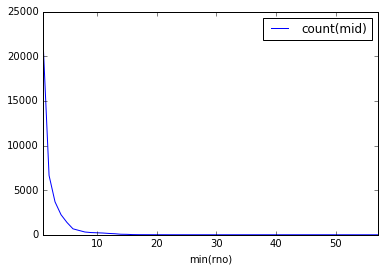

In [90]:
sql = "SELECT min(rno), count(mid) FROM RecipientBase GROUP BY rno"
message_counts = pd.read_sql(sql,con=conn)
message_counts.plot(x='min(rno)', y='count(mid)')

## 3. Data Merging

Use the pandas merge function to combine the information in the 3 dataframes to answer the following questions:

1. Are there more Men or Women employees?
- How is gender distributed across departments?
- Who is sending more emails? Men or Women?
- What's the average number of emails sent by each gender?
- Are there more Juniors or Seniors?
- Who is sending more emails? Juniors or Seniors?
- Which department is sending more emails? How does that relate with the number of employees in the department?
- Who are the top 3 senders of emails? (people who sent out the most emails)

In [ ]:
enron = pd.merge()

Also answer the following questions regarding received messages

- Who is receiving more emails? Men or Women?
- Who is receiving more emails? Juniors or Seniors?
- Which department is receiving more emails? How does that relate with the number of employees in the department?
- Who are the top 5 receivers of emails? (people who received the most emails)

Which employees sent the most 'mass' emails?

Keep exploring the dataset, which other questions would you ask?

Work in pairs. Give each other a challenge and try to solve it.